<a href="https://colab.research.google.com/github/Bharatgaur/Projects/blob/main/Bengaluru_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bangalore House Price Prediction**    -



##### **Project Type**    - Regression

# **Project Summary**

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

# **GitHub Link**

Provide your GitHub Link here.

# **Problem Statement**

**Identify the house price by using machine learning**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [24]:
# Import Libraries

import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [4]:
# Specify the Kaggle dataset API command
kaggle_command = "kaggle datasets download -d amitabhajoy/bengaluru-house-price-data"

# Execute the command
os.system(kaggle_command)

# Unzipping the dataset
with zipfile.ZipFile("bengaluru-house-price-data.zip", 'r') as zip_ref:
    zip_ref.extractall("bengaluru_house_price_data")

# Optional: Remove the zip file after extraction
os.remove("bengaluru-house-price-data.zip")

print("Dataset downloaded and extracted successfully.")


Dataset downloaded and extracted successfully.


In [5]:
# Load the dataset
file_path = "bengaluru_house_price_data/Bengaluru_House_Data.csv"  # Adjust the path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
df.shape

(13320, 9)

### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [36]:
for column in df.columns:
  print(df[column].value_counts)
  print("*"*20)

<bound method IndexOpsMixin.value_counts of 0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object>
********************
<bound method IndexOpsMixin.value_counts of 0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object>
********************
<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4         

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 529


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("Missing/Null values count for each column:")
print(missing_values_count)

Missing/Null values count for each column:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [15]:
# Total missing values in the entire dataset
total_missing_values = df.isnull().sum().sum()

print(f"Total missing/null values in the dataset: {total_missing_values}")


Total missing/null values in the dataset: 6201


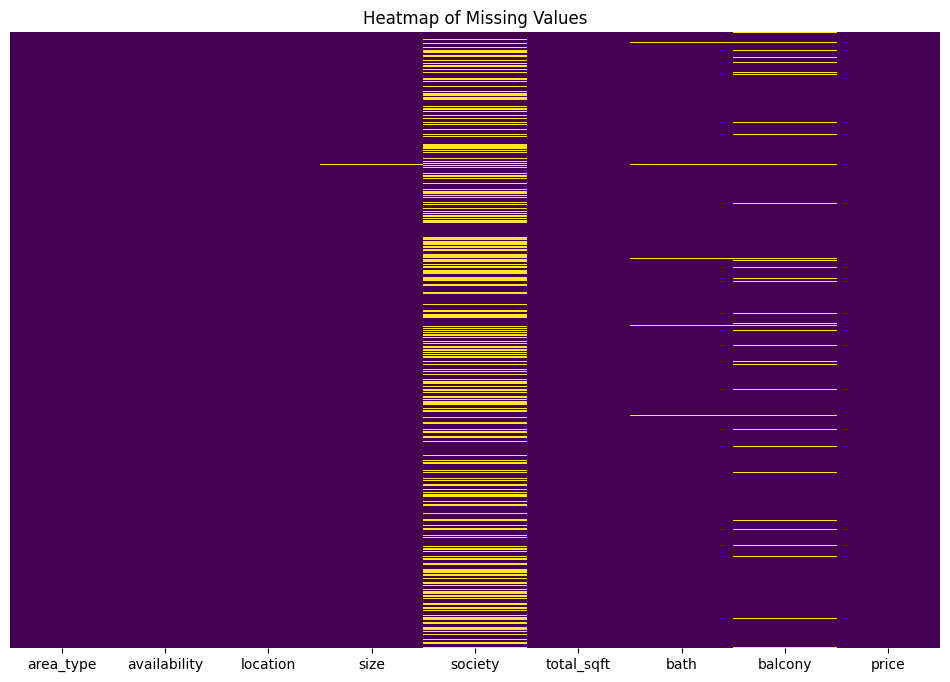

In [17]:
# Visualizing the missing values

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Set the title of the heatmap
plt.title('Heatmap of Missing Values')
plt.show()


### Outcome from our dataset are as following:

Number of duplicate rows: 529

shape of our data is (13320, 9)

Missing/Null values count for each column:

area_type          0

availability       0

location           1

size              16

society         5502

total_sqft         0

bath              73

balcony          609

price              0



Society have the most missing values 5502 and balcony have the missing values 609

In [38]:
df.drop(columns=['area_type', 'availability','society','balcony'],inplace=True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [39]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [19]:
# Dataset Describe
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Variables Description

Here's a description of the variables in the Bengaluru House Price dataset based on the provided column names:

### Variables Description

1. **area_type**:
   - **Description**: This categorical variable indicates the type of area where the property is located. Common types may include "Apartment," "Independent House," "Villa," etc.
   - **Type**: Categorical

2. **availability**:
   - **Description**: This variable shows the availability status of the property, indicating whether it is ready to move in or under construction. It typically contains values like "Ready To Move" or "Not Ready."
   - **Type**: Categorical

3. **location**:
   - **Description**: This variable specifies the geographical location or neighborhood of the property in Bengaluru. It provides information about where the property is situated.
   - **Type**: Categorical

4. **size**:
   - **Description**: This categorical variable describes the size of the property, often represented in terms of the number of bedrooms or units, such as "1 BHK," "2 BHK," etc.
   - **Type**: Categorical

5. **society**:
   - **Description**: This variable refers to the name of the residential society or complex where the property is located, if applicable. It can provide insights into the amenities and environment of the property.
   - **Type**: Categorical

6. **total_sqft**:
   - **Description**: This numerical variable represents the total area of the property in square feet. It is a continuous variable and crucial for calculating the price per square foot.
   - **Type**: Numerical (Float/Integer)

7. **bath**:
   - **Description**: This numerical variable indicates the number of bathrooms in the property. It is a discrete variable.
   - **Type**: Numerical (Integer)

8. **balcony**:
   - **Description**: This numerical variable specifies the number of balconies in the property. Like the bathroom count, it is also a discrete variable.
   - **Type**: Numerical (Integer)

9. **price**:
   - **Description**: This numerical variable represents the price of the property in Indian Rupees (INR). It is a continuous variable and is the target variable for price prediction analysis.
   - **Type**: Numerical (Float/Integer)

### Summary
The Bengaluru House Price dataset contains a mix of categorical and numerical variables that provide insights into the characteristics of properties in Bengaluru. This information can be used for exploratory data analysis and predictive modeling to understand factors affecting property prices.

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.

# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")  # Add a newline for better readability


Unique values in 'area_type':
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


Unique values in 'availability':
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


Unique values in 'location':
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th 

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Explore and Analyze the Data**

**Understand the data distribution and relationships.**

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


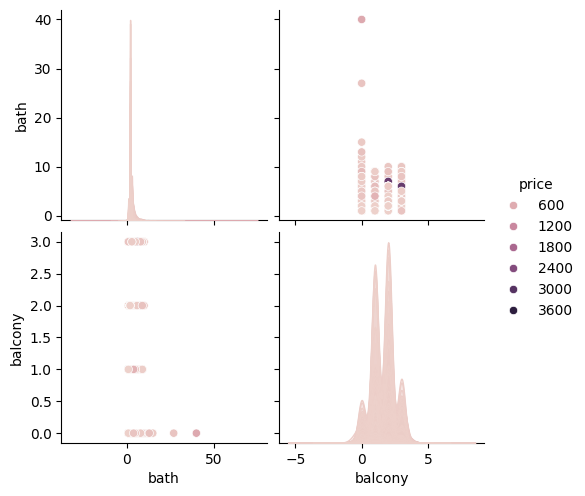

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize data
sns.pairplot(df, hue='price')  # 'price' is the target variable
plt.show()

In [25]:
# Set the style for seaborn
sns.set(style="whitegrid")

#### Chart - 1

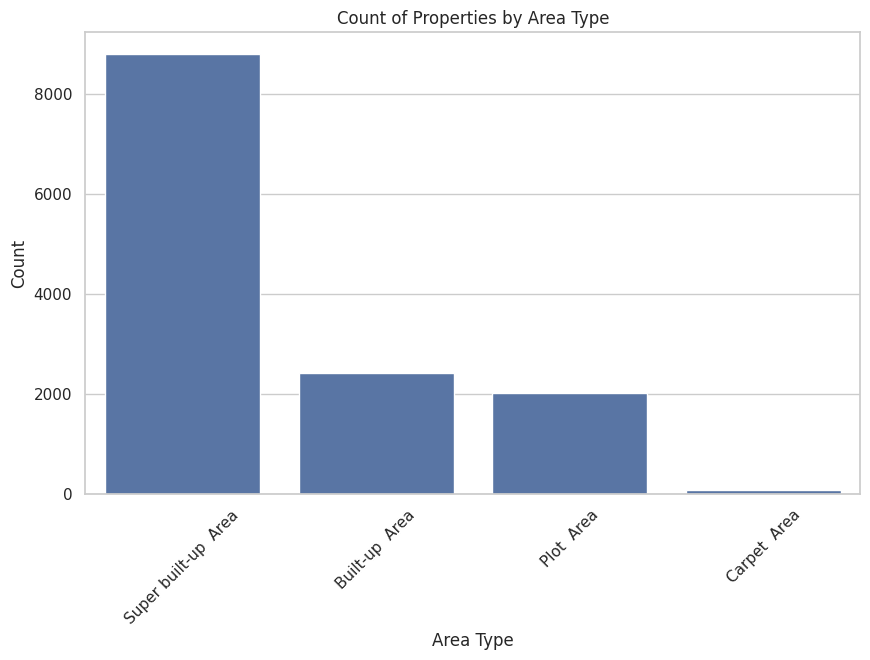

In [26]:
# 1. Bar plot for 'area_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='area_type', order=df['area_type'].value_counts().index)
plt.title('Count of Properties by Area Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Area Type')
plt.show()

##### 1. Count of Properties by Area Type: A bar plot that shows how many properties exist for each type of area (e.g., apartment, villa).

##### 2. Insight(s) found from the chart are Super built-up Area have the maximum area

#### Chart - 2

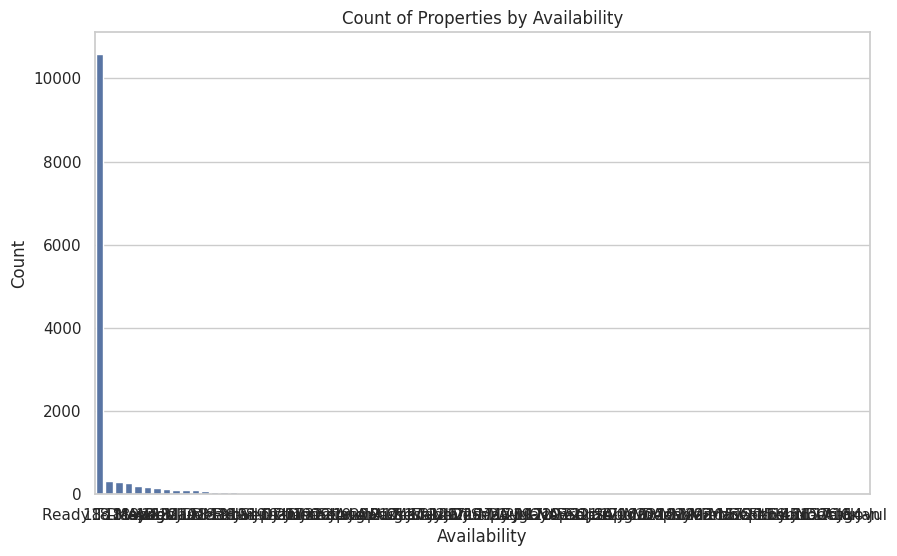

In [27]:
# 2. Bar plot for 'availability'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='availability', order=df['availability'].value_counts().index)
plt.title('Count of Properties by Availability')
plt.ylabel('Count')
plt.xlabel('Availability')
plt.show()

##### Count of Properties by Availability: A bar plot visualizing how many properties are ready to move in versus those that are not.

#### Chart - 3

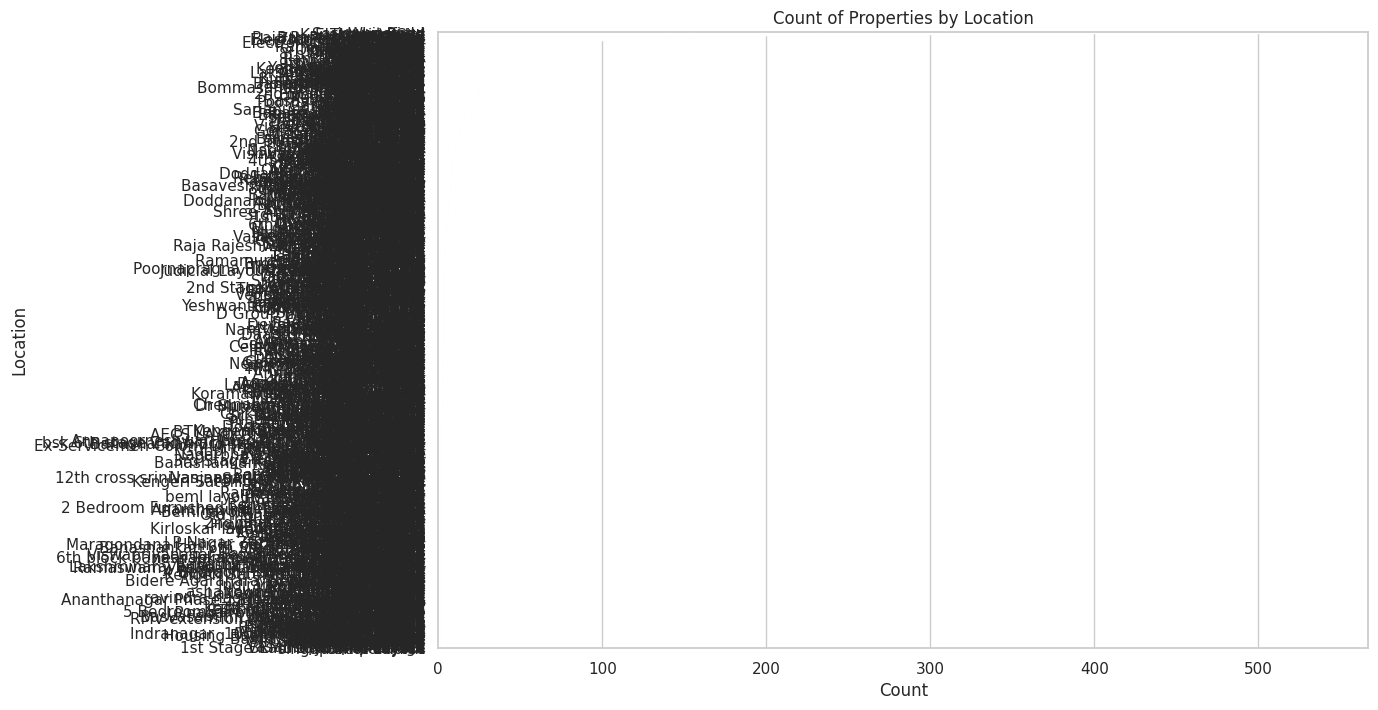

In [28]:
# Chart - 3 visualization code
# 3. Bar plot for 'location'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='location', order=df['location'].value_counts().index)
plt.title('Count of Properties by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

##### Count of Properties by Location: A horizontal bar plot displaying the count of properties for different locations in Bengaluru.

#### Chart - 4

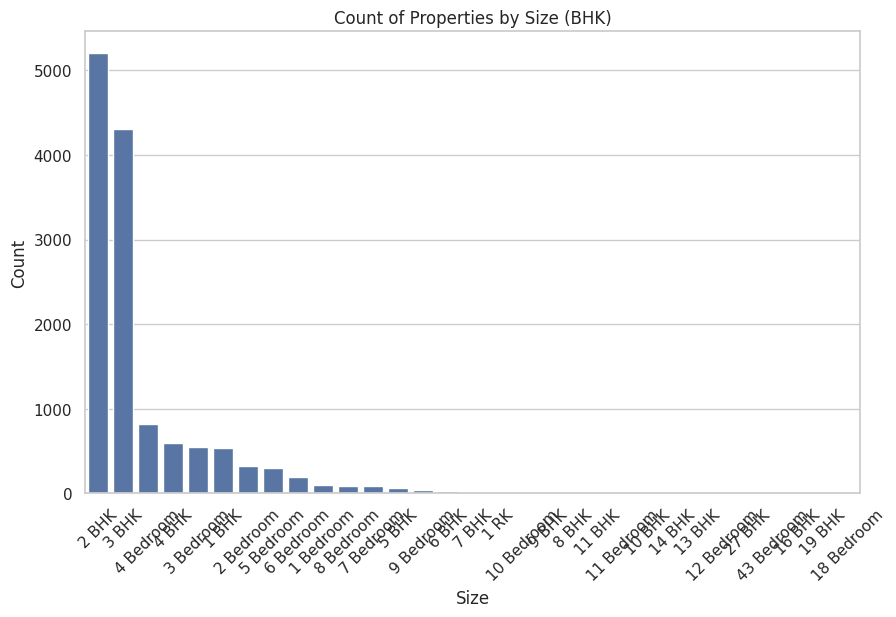

In [29]:
# 4. Bar plot for 'size'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='size', order=df['size'].value_counts().index)
plt.title('Count of Properties by Size (BHK)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Size')
plt.show()

##### Count of Properties by Size: This bar plot shows the distribution of property sizes (e.g., 1 BHK, 2 BHK).

#### Chart - 5

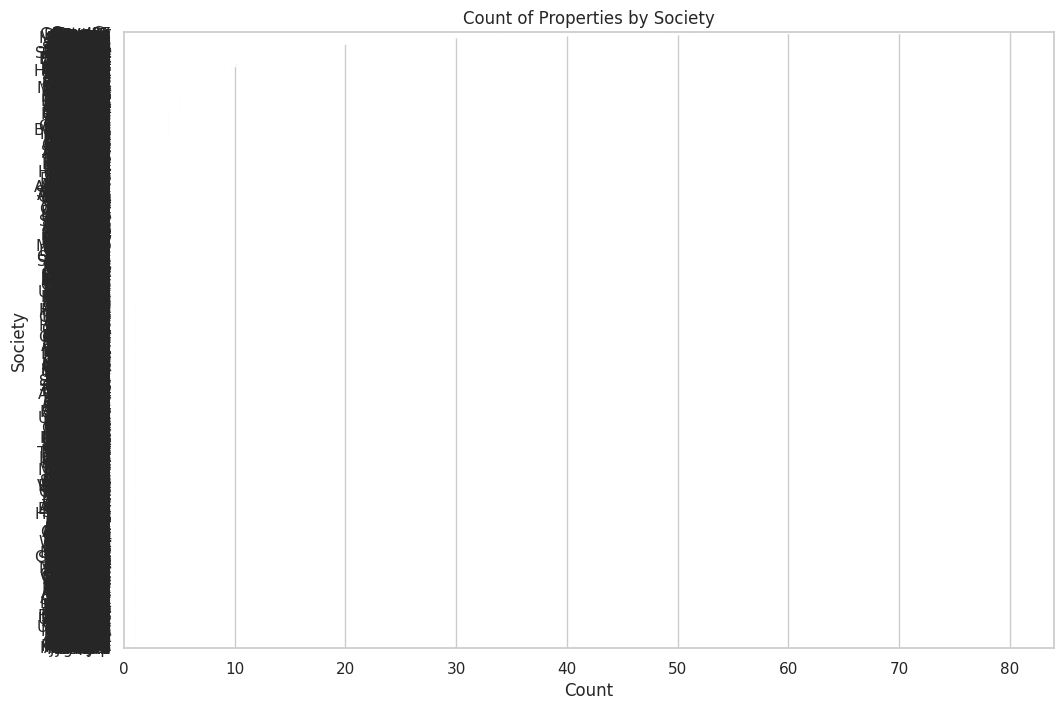

In [30]:
# 5. Bar plot for 'society'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='society', order=df['society'].value_counts().index)
plt.title('Count of Properties by Society')
plt.xlabel('Count')
plt.ylabel('Society')
plt.show()

##### Count of Properties by Society: A horizontal bar plot visualizing the number of properties in different societies.

#### Chart - 6

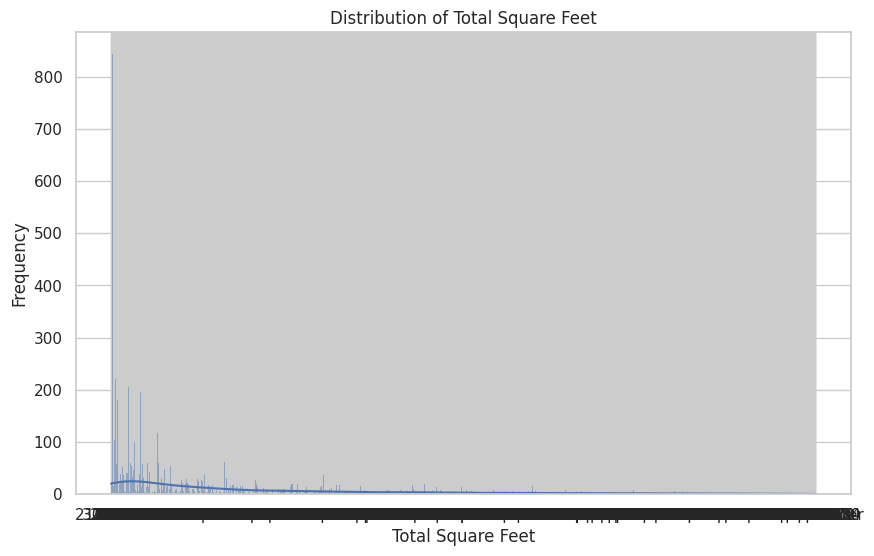

In [31]:
# 6. Histogram for 'total_sqft'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sqft'], bins=30, kde=True)
plt.title('Distribution of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.show()

##### Distribution of Total Square Feet: A histogram to show how the total square footage of properties is distributed, with a Kernel Density Estimate (KDE) overlay for better visualization.

#### Chart - 7

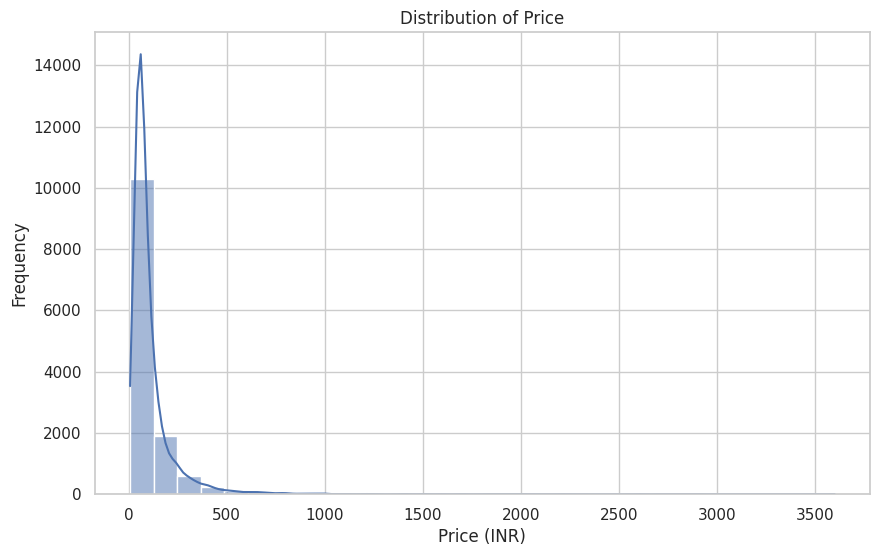

In [32]:
# 7. Histogram for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

##### Distribution of Price: A histogram that displays the distribution of property prices, also with a KDE overlay.

#### Chart - 8

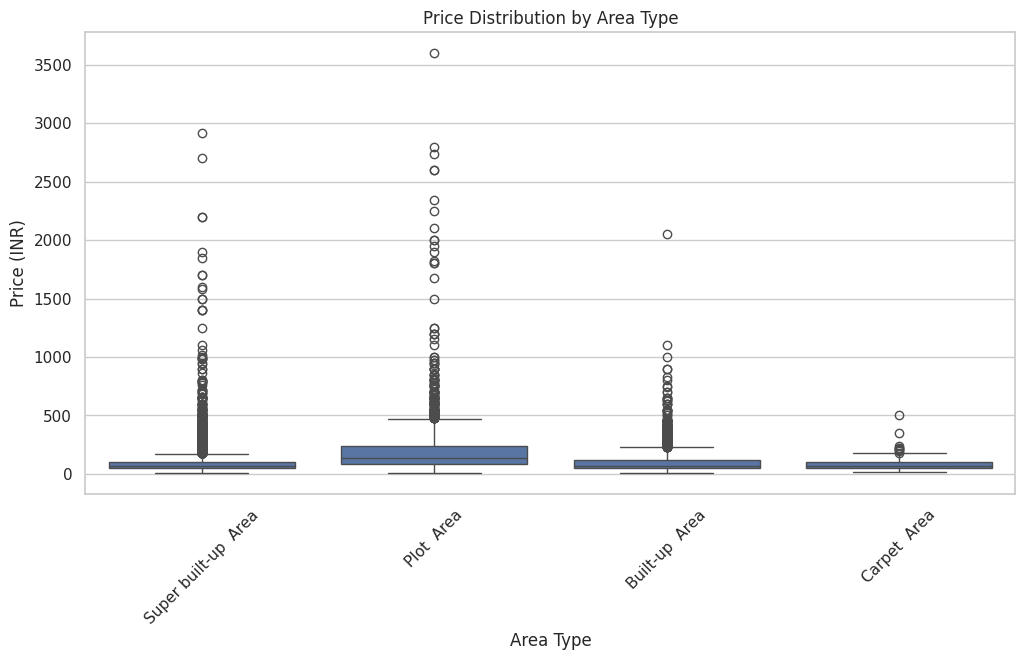

In [33]:
# 8. Box plot for 'price' vs 'area_type'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='area_type', y='price')
plt.title('Price Distribution by Area Type')
plt.xticks(rotation=45)
plt.ylabel('Price (INR)')
plt.xlabel('Area Type')
plt.show()

##### Price Distribution by Area Type: A box plot showing how property prices vary for different area types, highlighting the median and outliers.

#### Chart - 9

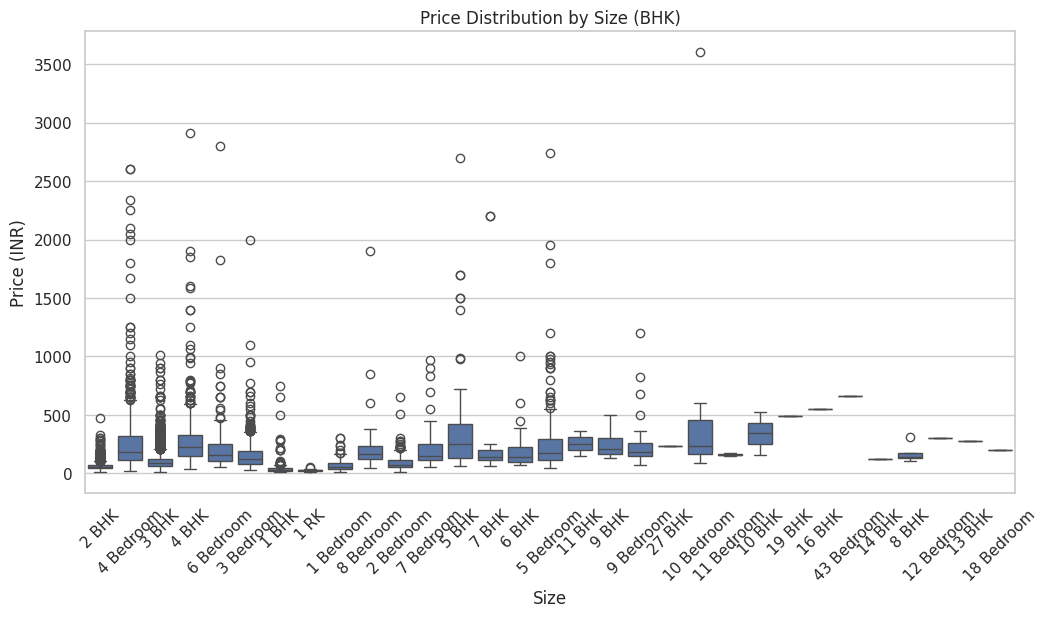

In [34]:
# 9. Box plot for 'price' vs 'size'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='size', y='price')
plt.title('Price Distribution by Size (BHK)')
plt.xticks(rotation=45)
plt.ylabel('Price (INR)')
plt.xlabel('Size')
plt.show()

##### Price Distribution by Size: A box plot that reveals how property prices change according to the size of the property (e.g., 1 BHK, 2 BHK).

#### Chart - 15 - Pair Plot

<Figure size 1200x800 with 0 Axes>

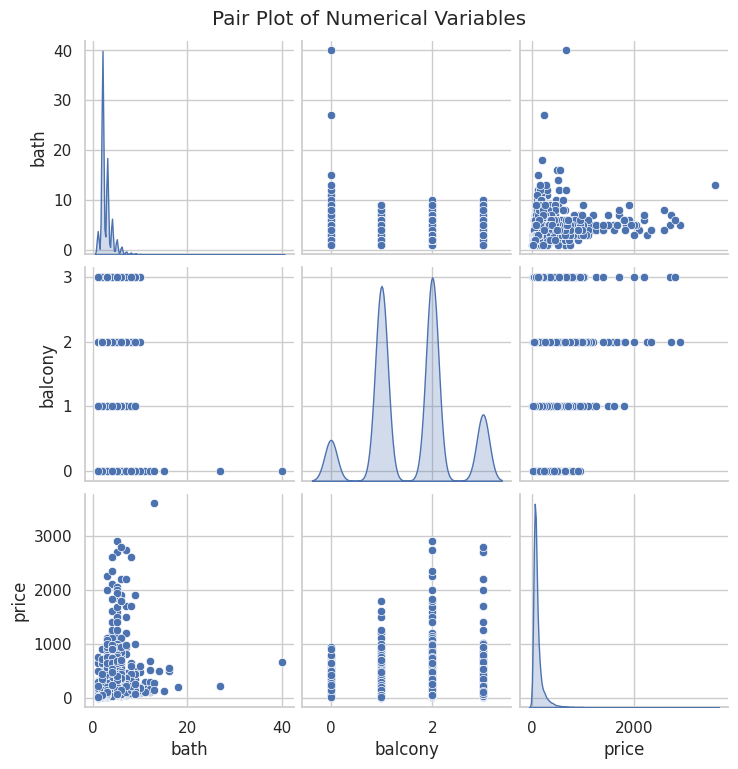

In [35]:
# Pair Plot visualization code

# Select only numerical variables for the pair plot
# If you have encoded categorical variables, include them as well if necessary
numerical_columns = ['total_sqft', 'bath', 'balcony', 'price']

# Create a pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns], diag_kind='kde')

# Set the title for the pair plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


### Reasons to Choose Pair Plot

1. **Visualize Relationships**:
   - Pair plots allow you to see the relationships between multiple numerical variables at once. By showing scatter plots for every pair of variables, you can quickly identify potential correlations or trends.

2. **Identify Distributions**:
   - The diagonal of the pair plot typically shows the distribution of each individual variable (often as histograms or KDE plots), providing insight into the central tendency and spread of the data.

3. **Detect Outliers**:
   - Scatter plots can help you spot outliers in the data, which might influence your analysis or modeling efforts.

4. **Understand Data Structure**:
   - By visualizing how different variables relate to each other, you can gain insights into the underlying structure of your dataset, including clustering or grouping behavior.

5. **Inform Feature Selection**:
   - The insights gained from a pair plot can help you decide which variables may be useful for predictive modeling. Strong relationships between variables can indicate potential features that contribute to the target variable.

6. **Ease of Use**:
   - Pair plots are straightforward to generate using libraries like Seaborn, making them accessible even to those who may not have advanced statistical training.

7. **Overall Summary**:
   - A pair plot provides a comprehensive view of the dataset in a single visualization, making it easier to summarize relationships and distributions for presentations or reports.

### Limitations

While pair plots are useful, it's essential to keep in mind some limitations:

- **Scalability**: Pair plots can become cluttered and hard to interpret if you have many variables. They are best used with a limited number of features.

- **Complex Relationships**: Pair plots might not capture complex relationships (like non-linear dependencies) as effectively as other advanced techniques, such as dimensionality reduction methods or machine learning models.

- **Overlapping Points**: In dense datasets, overlapping points can obscure meaningful patterns. Techniques like jittering or transparency may be necessary to improve visibility.

In summary, pair plots are a valuable tool in the data analyst's toolkit for initial data exploration, helping to reveal insights that can guide further analysis and modeling.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

 **Preprocess the Data**

**Handle missing values, encode categorical variables, and split the data.**

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation

df['location'] = df['location'].fillna('Sarjapur Road')
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [42]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [43]:
df['size'] = df['size'].fillna('2 BHK')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [44]:
df['bath'] = df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [45]:
df['bhk']= df['size'].str.split().str.get(0).astype(int)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [47]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [48]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
    return (float(temp[0])+ float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [49]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [50]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


price per square feet

In [52]:
df['price_per_sqft'] = df['price']*10000/df['total_sqft']
df['price_per_sqft']

,price_per_sqft
0,369.981061
1,461.538462
2,430.555556
3,624.589086
4,425.000000
...,...
13315,668.983493
13316,1111.111111
13317,525.854514
13318,1040.733632


In [53]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+02
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+04
min,1.000000,1.000000,8.000000,1.000000,2.678298e+01
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+02
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+02
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+02
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+06


In [54]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
singapura paradise,1


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

**Preprocess the Data**

**Handle missing values, encode categorical variables, and split the data.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values (example: fill with mean)
data.fillna(data.mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## ***7. ML Model Implementation***

**Choose a Model**

**Select a model based on the problem. For classification, let’s use a Random Forest classifier.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)


**Train the Model**

**Fit the model to the training data.**

In [ ]:
# Train the model
model.fit(X_train, y_train)


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Evaluate the Model**

**Check the model’s performance on the test data.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


**Tune the Model**

**Optimize the model parameters using Grid Search.**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

**Deploy the Model**

**Export the trained model for deployment.**

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'customer_churn_model.pkl')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***